In [1]:
from FFP_SA import FFP

reading parameters...
NARROWBAND SIMULATION
earth-atmosphere


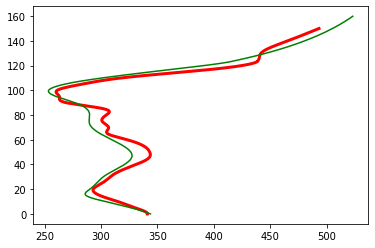

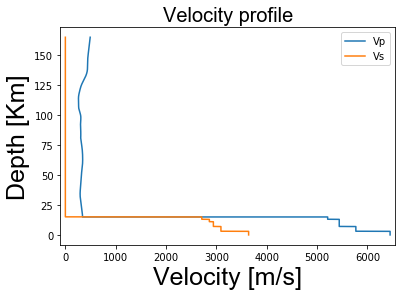

SOLVING  SEISMO-ACOUSTIC
Get Green's
Go to range
106.22856712341309
creating directory


/Users/gilaverbuch/dev/python/SA_FFP/output_.py:233: RuntimeWarning: divide by zero encountered in log10
  writer.writerows(zip(r/1000,20*np.log10(a1/a2)))
/Users/gilaverbuch/dev/python/SA_FFP/output_.py:240: RuntimeWarning: divide by zero encountered in log10
  plt.plot(r/1000,20*np.log10(a1/a2))


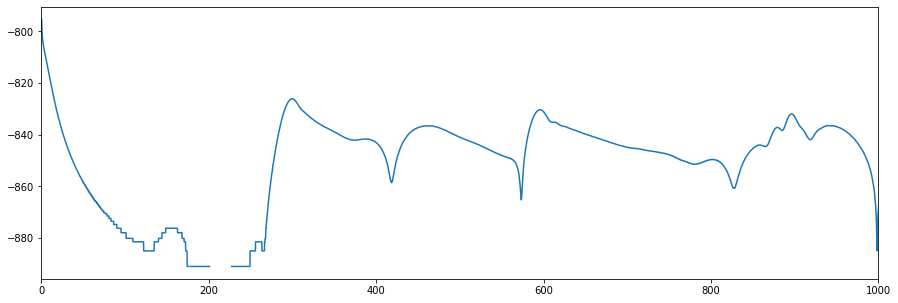

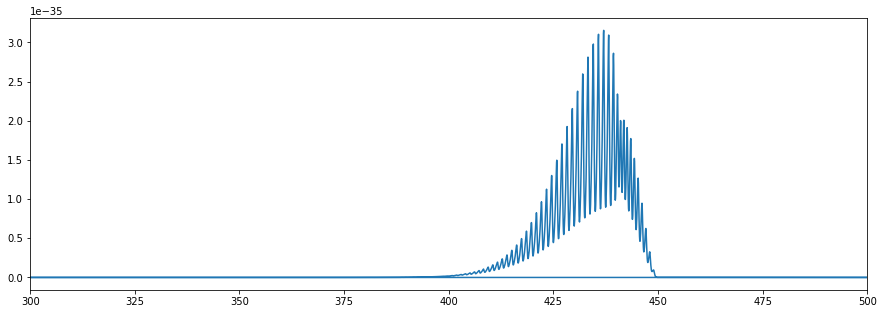

In [7]:
FFP('input-parameters')

In [12]:
import xarray as xr
import pandas as pd
import numpy as np


domain = pd.merge(
    pd.read_table(
        'Results/Haiti_FFP_simulations/Haiti_S_10km/Vp.csv',
        header=None, names=['z', 'c']
    ),
    pd.read_table(
        'Results/Haiti_FFP_simulations/Haiti_S_10km/rho.csv',
        header=None, names=['z', 'rho']
    )
)

domain.z -= 15
domain['rhoXc'] = domain.rho * domain.c
domain.set_index('z', inplace=True)

source_depths = np.arange(10, 0, -2)
source_offset = np.arange(0, 10, 2)
scale_factor = 1 / np.sqrt(source_offset)
scale_factor[0] = 1

ds = 0
for factor, depth in zip(scale_factor, source_depths):
    filename = f'Results/Haiti_FFP_simulations/Haiti_S_{depth}km/Abs_pressure.nc'
    with xr.open_dataset(filename) as ds_:
        ds_ = ds_.sel(r=slice(0, 1800)).where(ds_.z>=0)
        ds += factor * ds_

ds = ds.merge(domain)

encoding = dict(zlib=True, complevel=9)
for var in ds.values():
    var.encoding = encoding

ds.to_netcdf('FFP.line_source.nc')
ds.close()

/Users/gilaverbuch/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


In [ ]:
import xarray as xr
ds = xr.open_dataset('Results/Haiti/Intensity.nc')
ds

In [ ]:
ds_lr = ds.sel(r=slice(0, 1800),
#                z=slice(0, 150)
              )
ds_lr

In [ ]:
ds_lr.diss.plot.imshow(x='r', y='z', cmap='inferno_r', interpolation='bilinear')

In [ ]:
import numpy as np
ds_norm = np.log10(ds_lr / ds_lr.sel(r=0, z=0, method='nearest'))

ds_norm.diss.sel(z=1, method='nearest').plot()

In [ ]:
ds_norm.diss.sel(z=slice(0, 150)).plot.imshow(x='r', y='z', cmap='inferno_r', interpolation='bilinear')

In [ ]:
ds_lr.sel(r=0, z=-1, method='nearest') / ds_lr.sel(r=0, z=-10, method='nearest')

In [ ]:
ds_lr.sel(r=0, z=-9, method='nearest')

In [ ]:
ds_lr.diss.where(ds_lr.diss==ds_lr.max())

In [ ]:
import numpy as np
a = np.array((1,2,3))
a

In [ ]:
b = a
b

In [ ]:
a[0] = 10
a, b